<AxesSubplot:xlabel='x', ylabel='y'>

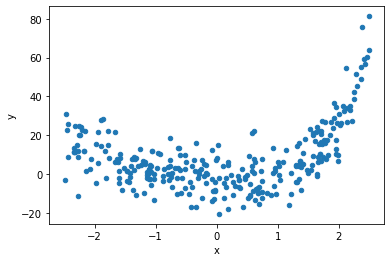

In [66]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y}) 
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [67]:
X = df.x
X

0     -1.385173
1     -0.021506
2     -0.932115
3     -0.511833
4     -1.610744
         ...   
295   -0.406108
296   -1.895091
297    1.494711
298    2.359557
299   -1.900466
Name: x, Length: 300, dtype: float64

In [68]:
type(X)

pandas.core.series.Series

In [69]:
y = df.y
y

0       8.024856
1      -4.192669
2      10.468011
3       2.474787
4       6.056254
         ...    
295     4.218621
296    14.451276
297     0.331431
298    55.318390
299    27.908785
Name: y, Length: 300, dtype: float64

In [70]:
type(y)

pandas.core.series.Series

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
print(len(X_train), len(X_test))

240 60


In [73]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

LinearRegression()

In [74]:
lin_reg_pred_test = lin_reg.predict(X_test.to_numpy().reshape(-1,1))
lin_reg_pred_train = lin_reg.predict(X_train.to_numpy().reshape(-1,1))

In [75]:
print(lin_reg_pred_test)

[[10.03960416]
 [ 3.61504063]
 [12.9481802 ]
 [15.29385401]
 [ 7.47937714]
 [10.19590946]
 [10.43732952]
 [ 1.80952278]
 [ 3.80804442]
 [12.46403819]
 [ 6.78860564]
 [ 7.37829669]
 [11.24183888]
 [ 2.52354107]
 [ 3.39915384]
 [-1.23641104]
 [ 4.44626216]
 [-0.31757909]
 [ 3.69500119]
 [ 5.28230568]
 [14.36969224]
 [ 5.95844925]
 [10.26318735]
 [ 9.52430501]
 [14.95565859]
 [ 0.40225933]
 [ 6.93293536]
 [ 6.26947681]
 [11.77239124]
 [ 5.11199781]
 [ 7.53076632]
 [13.14381302]
 [-1.90107741]
 [14.83135125]
 [ 4.50486352]
 [11.69918685]
 [ 3.25824651]
 [ 7.6319644 ]
 [ 4.5083825 ]
 [14.08997828]
 [14.53656184]
 [11.53645715]
 [ 5.73781493]
 [15.11211608]
 [17.71857912]
 [-1.20192157]
 [10.36827515]
 [ 1.60418006]
 [14.58066598]
 [-1.65507786]
 [-1.90301821]
 [ 3.27788272]
 [ 6.56180016]
 [ 6.66891918]
 [ 3.14667786]
 [11.55517173]
 [ 6.25080253]
 [10.5708661 ]
 [17.26496109]
 [ 1.14922396]]


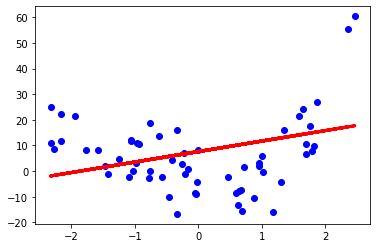

In [76]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, lin_reg_pred_test, color="red", linewidth=3)

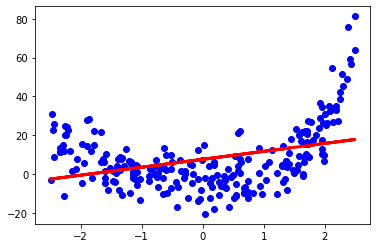

In [77]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, lin_reg_pred_train, color="red", linewidth=3)

In [78]:
from sklearn.metrics import mean_squared_error as mse

In [79]:
lin_reg_mse_test = mse(y_test, lin_reg_pred_test)
lin_reg_mse_train = mse(y_train, lin_reg_pred_train)

In [80]:
print(lin_reg_mse_test)

212.84992945855512


In [81]:
print(lin_reg_mse_train)

222.8969309459854


In [82]:
import sklearn.neighbors
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

KNeighborsRegressor(n_neighbors=3)

In [83]:
knn_3_reg_pred_test = knn_3_reg.predict(X_test.to_numpy().reshape(-1,1))
knn_3_reg_pred_train = knn_3_reg.predict(X_train.to_numpy().reshape(-1,1))

In [84]:
print(knn_3_reg_pred_test)

[[14.96272832]
 [-3.85806315]
 [ 1.56872954]
 [24.26621109]
 [-4.6516743 ]
 [ 4.73704782]
 [-7.86649542]
 [ 0.29636664]
 [-0.48451955]
 [ 0.96033931]
 [ 1.88523981]
 [-9.67409381]
 [ 2.49949202]
 [ 8.07963043]
 [-3.85806315]
 [12.00221246]
 [ 4.98511155]
 [16.4005495 ]
 [-6.34755978]
 [ 0.76190357]
 [ 5.10626064]
 [-9.05643843]
 [-4.59881056]
 [-6.37070723]
 [20.10212961]
 [11.7872387 ]
 [ 0.18290703]
 [ 2.38429851]
 [-3.17159082]
 [ 5.01764115]
 [-4.6516743 ]
 [ 2.15193184]
 [12.09009618]
 [17.17373234]
 [ 3.3980187 ]
 [-3.17159082]
 [-0.14127811]
 [ 4.54798598]
 [ 3.3980187 ]
 [11.38967842]
 [15.93056628]
 [-5.43701701]
 [-4.90990139]
 [21.47181455]
 [67.31011238]
 [12.00221246]
 [-8.95179358]
 [-2.09391975]
 [19.7272898 ]
 [ 8.41967827]
 [12.09009618]
 [-0.14127811]
 [-3.41485798]
 [-0.68941505]
 [ 2.54392916]
 [-5.43701701]
 [ 2.38429851]
 [-1.54244617]
 [61.37035279]
 [ 2.64480891]]


In [85]:
print(knn_3_reg_pred_train)

[[ 1.14120399e+01]
 [ 2.15193184e+00]
 [-6.98813698e-02]
 [ 8.93335083e+00]
 [-4.28057065e+00]
 [ 2.01021296e+01]
 [ 6.73101124e+01]
 [ 1.73033805e+00]
 [ 5.57633508e+00]
 [-2.44943704e+00]
 [-4.56191514e-01]
 [ 1.57696809e+01]
 [ 1.20900962e+01]
 [-4.60187252e+00]
 [ 1.72705785e+00]
 [-1.22271313e+00]
 [ 1.17872387e+01]
 [-9.05643843e+00]
 [ 4.31829776e+00]
 [ 2.75038475e+01]
 [ 1.82907030e-01]
 [ 2.19855822e+01]
 [ 3.84923140e+01]
 [ 1.13896784e+01]
 [ 3.39801870e+00]
 [ 2.96366640e-01]
 [-6.40665371e+00]
 [-3.41485798e+00]
 [ 1.97272898e+01]
 [ 3.18389082e+01]
 [-8.95179358e+00]
 [ 3.18389082e+01]
 [ 5.57633508e+00]
 [-4.55328960e+00]
 [-2.52430387e+00]
 [ 6.93703678e-01]
 [ 5.47883921e-01]
 [-4.56191514e-01]
 [ 1.26730645e+01]
 [ 1.01433446e+01]
 [ 1.73033805e+00]
 [ 6.13703528e+01]
 [-4.28057065e+00]
 [ 2.07529038e+00]
 [ 3.84923140e+01]
 [-2.21154077e+00]
 [-1.22271313e+00]
 [ 4.92789680e-01]
 [ 3.47167307e+00]
 [-9.11525375e+00]
 [ 2.07529038e+00]
 [ 1.20900962e+01]
 [ 2.9186158

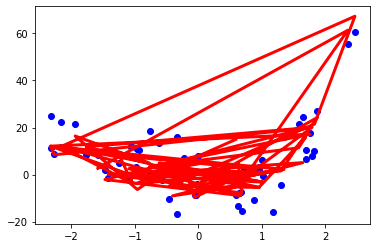

In [86]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, knn_3_reg_pred_test, color="red", linewidth=3)

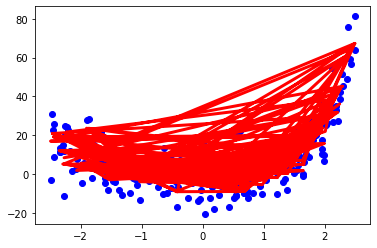

In [87]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, knn_3_reg_pred_train, color="red", linewidth=3)

In [124]:
knn_3_reg_mse_test = mse(y_test, knn_3_reg_pred_test)
knn_3_reg_mse_train = mse(y_train, knn_3_reg_pred_train)

In [125]:
print(knn_3_reg_mse_test)

89.60652801867124


In [90]:
print(knn_3_reg_mse_train)

46.692123484604586


In [91]:
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

KNeighborsRegressor()

In [92]:
knn_5_reg_pred_test = knn_5_reg.predict(X_test.to_numpy().reshape(-1,1))
knn_5_reg_pred_train = knn_5_reg.predict(X_train.to_numpy().reshape(-1,1))

In [93]:
print(knn_5_reg_pred_test)

[[10.62313754]
 [-3.23347223]
 [ 4.7518779 ]
 [25.32852044]
 [-6.03044542]
 [ 5.35503363]
 [-7.37588551]
 [ 2.05853829]
 [-3.4394171 ]
 [ 2.72828905]
 [-1.27078165]
 [-4.96231988]
 [-2.55169309]
 [ 3.97150234]
 [-3.23347223]
 [16.16211197]
 [ 2.79620902]
 [11.81781333]
 [-3.4394171 ]
 [ 2.98915531]
 [ 7.22079438]
 [-3.57201056]
 [-4.10936509]
 [-5.77568728]
 [17.81998565]
 [10.70239189]
 [-1.27078165]
 [ 1.81992368]
 [-1.87558409]
 [ 3.76067354]
 [-2.56730795]
 [ 3.92418356]
 [ 7.97359805]
 [18.85585764]
 [ 0.8208091 ]
 [-3.07079674]
 [ 1.23205793]
 [-1.74057146]
 [ 0.8208091 ]
 [10.75109264]
 [18.06941482]
 [ 0.2075865 ]
 [-3.73144535]
 [20.79769931]
 [67.417814  ]
 [16.16211197]
 [-5.48193128]
 [-0.54138463]
 [16.97174914]
 [12.08232892]
 [ 7.97359805]
 [ 0.38273865]
 [-1.42245469]
 [-0.95097647]
 [ 2.43130531]
 [ 0.2075865 ]
 [ 1.81992368]
 [-4.73678313]
 [57.32658621]
 [-0.4667114 ]]


In [94]:
print(knn_5_reg_pred_train)

[[ 8.63492469e+00]
 [ 3.92418356e+00]
 [ 1.81992368e+00]
 [ 8.78339615e+00]
 [-4.37804739e+00]
 [ 1.78199857e+01]
 [ 6.74178140e+01]
 [ 1.45800895e+00]
 [ 1.18178133e+01]
 [ 8.20809099e-01]
 [ 9.79904516e-01]
 [ 1.67416400e+01]
 [ 7.97359805e+00]
 [-5.38755802e+00]
 [ 1.24096611e+00]
 [-4.96231988e+00]
 [ 1.51652645e+01]
 [-3.57201056e+00]
 [ 1.12722429e-01]
 [ 1.97523773e+01]
 [-1.27078165e+00]
 [ 1.97523773e+01]
 [ 3.65850741e+01]
 [ 1.07510926e+01]
 [ 8.20809099e-01]
 [ 2.05853829e+00]
 [-4.37804739e+00]
 [-2.43044605e-02]
 [ 1.69717491e+01]
 [ 3.12680426e+01]
 [-5.48193128e+00]
 [ 3.12680426e+01]
 [ 1.18178133e+01]
 [-4.73678313e+00]
 [-1.74057146e+00]
 [ 8.22663068e-01]
 [ 1.91124364e+00]
 [ 9.79904516e-01]
 [ 1.35055763e+01]
 [ 6.61230767e+00]
 [ 1.45800895e+00]
 [ 5.73265862e+01]
 [-4.37804739e+00]
 [ 1.32440363e+00]
 [ 3.61991882e+01]
 [-4.04385258e+00]
 [-4.96231988e+00]
 [ 1.32440363e+00]
 [ 1.45921169e+00]
 [-2.79064130e+00]
 [ 1.32440363e+00]
 [ 7.97359805e+00]
 [ 1.2620657

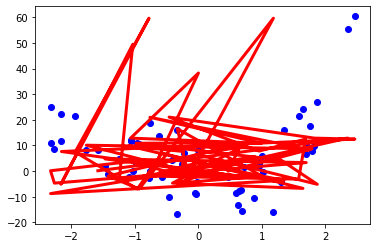

In [95]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, knn_5_reg_pred, color="red", linewidth=3)

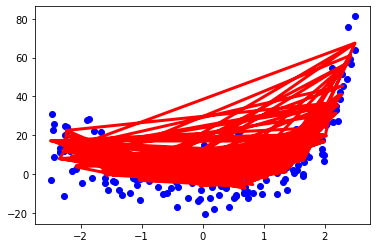

In [96]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, knn_5_reg_pred_train, color="red", linewidth=3)

In [97]:
knn_5_reg_mse_test = mse(y_test, knn_5_reg_pred_test)
knn_5_reg_mse_train = mse(y_train, knn_5_reg_pred_train)

In [98]:
print(knn_5_reg_mse_test)

84.18838924105548


In [99]:
print(knn_5_reg_mse_train)

57.61946894520035


In [112]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_feature_2.fit_transform(X_train.to_numpy().reshape(-1,1))
print(X_train.to_numpy().reshape(-1,1)[0], X_poly_train[0])

[1.4213854] [1.4213854  2.02033644]


In [115]:
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly_train, y_train)

LinearRegression()

In [128]:
poly_2_reg_pred_test = poly_2_reg.predict(poly_feature_2.fit_transform(X_test.to_numpy().reshape(-1,1)))
poly_2_reg_pred_train = poly_2_reg.predict(poly_feature_2.fit_transform(X_train.to_numpy().reshape(-1,1)))

In [129]:
print(poly_2_reg_pred_test)

[-6.61744691e-01 -2.79128183e+00  1.03695363e+01  2.38365633e+01
 -5.17942362e+00 -2.28467783e-01  4.76355199e-01  2.12093218e+00
 -3.17333542e+00  8.09804928e+00 -5.56551317e+00 -5.25802507e+00
  3.13716715e+00 -1.10697412e-01 -2.33119447e+00  1.58880485e+01
 -4.23995936e+00  1.10102705e+01 -2.95291695e+00 -5.18010902e+00
  1.80435583e+01 -5.56126872e+00 -3.63956293e-02 -1.96180621e+00
  2.16431310e+01  7.62633182e+00 -5.51409187e+00 -5.62273784e+00
  5.15458270e+00 -5.03064113e+00 -5.13655702e+00  1.13367202e+01
  1.98068649e+01  2.08582327e+01 -4.32275358e+00  4.86380832e+00
 -2.01225515e+00 -5.04641548e+00 -4.32764426e+00  1.64150834e+01
  1.90426977e+01  4.23166963e+00 -5.47416233e+00  2.26473217e+01
  4.20470422e+01  1.56936441e+01  2.70337704e-01  2.83273170e+00
  1.93102240e+01  1.83182778e+01  1.98187875e+01 -2.05758419e+00
 -5.61510205e+00 -5.59643606e+00 -1.74927672e+00  4.30336867e+00
 -5.62107185e+00  8.84782344e-01  3.83086334e+01  4.52119678e+00]


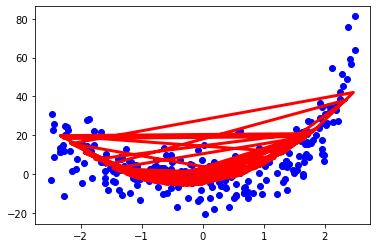

In [130]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_test, poly_2_reg_pred_test, color="red", linewidth=3)

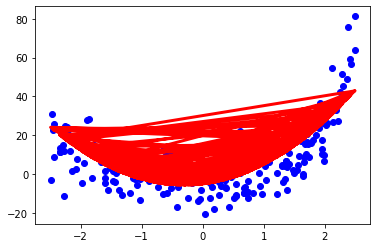

In [134]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, poly_2_reg_pred_train, color="red", linewidth=3)

In [131]:
poly_2_reg_mse_test = mse(y_test, poly_2_reg_pred_test)
poly_2_reg_mse_train = mse(y_train, poly_2_reg_pred_train)

In [132]:
print(poly_2_reg_mse_test)

104.86285748757192


In [133]:
print(poly_2_reg_mse_train)

98.21556666119567
